In [86]:
from scipy.io import loadmat  
from pylab import * 
from scipy.io import loadmat
from numpy.fft import fft, rfft
from numpy import where
from scipy.signal import spectrogram


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
data = loadmat('/Users/home/Desktop/computational N/stuff/EEG_P2090_processed.mat')

In [89]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEG_P2090_processed'])

In [90]:
EEG = data["EEG_P2090_processed"]
EEG = data['EEG_P2090_processed'].reshape(-1)  
num_channel = eeg_np.shape[0]
num_sample = eeg_np.shape [1]
print(f"number of channels is {num_channel}")
print(f"number of sample is {num_sample}")



number of channels is 29
number of sample is 150310


In [91]:
n_trial = len(EEG)
sampling_frequency = 500
time_range = np.arange(0, n_trial) / sampling_frequency
delta_t = time_range[1] - time_range[0]
sampling_frequency = 1 / delta_t

In [92]:
select_range = [0, 2000]
 
eeg_range = eeg_np[select_range[0]:select_range[1]]
time_range = np.arange(0, n_trial) / sampling_frequency
delta_t = time_range[1] - time_range[0]


time_duration = len(eeg_range) * delta_t

print(np.shape(eeg_range))
print(type(time_duration))
print(eeg_range)
print(time_duration)

(29, 150310)
<class 'numpy.float64'>
[[ 0.08099003  0.38671721  0.85455762 ...  0.20612061  0.1243387
   0.07913327]
 [ 0.06588963  0.42519367  0.91695394 ...  0.25171279  0.33942146
   0.45061869]
 [ 0.14993292  0.58781633  1.04748039 ... -0.07837302  0.25798247
   0.1771873 ]
 ...
 [-0.52378222 -0.62752993 -0.66040078 ... -0.49474289 -0.54995814
  -0.58349074]
 [-0.58428771 -0.83443523 -0.97892268 ... -0.33422464 -0.30624082
  -0.30239014]
 [-0.25038106 -0.30457022 -0.38009657 ...  0.04978373 -0.10943916
  -0.1790117 ]]
0.058


In [93]:
mn = EEG.mean()  # Compute the mean of the data
vr = EEG.var()   # Compute the variance of the data
sd = EEG.std()   # Compute the standard deviation of the data

print('mn = ' + str(mn))
print('vr = ' + str(vr))
print('sd = ' + str(sd))

mn = 5.330864497587767e-05
vr = 0.7372079669417495
sd = 0.8586081568106312


In [98]:
np.ravel(EEG)


array([ 0.08099003,  0.38671721,  0.85455762, ...,  0.04978373,
       -0.10943916, -0.1790117 ])

In [95]:
select_range = [0, 2500]
EEG_range = eeg_np[select_range[0]:select_range[1]]


In [111]:
plt.figure(figsize=(20, 10))

lags = np.arange(-len(EEG_range) + 1, len(EEG_range))    
                                 
ac = 1 / len(EEG_range) * np.correlate(EEG_range - EEG_range.mean(), EEG_range - EEG_range.mean(), mode='full')
inds = abs(lags) <= 100               
plt.plot(lags[inds] * delta_t, ac[inds])      
plt.xlabel('Lag [s]')                     

plt.ylabel('Auto-covariance')

plt.show()
     #I HAVE NO IDEA WHY ITS NOT RUNNIN


ValueError: object too deep for desired array

<Figure size 2000x1000 with 0 Axes>

In [112]:
lags = arange(-len(EEG) + 1, len(EEG)
          
ac = 1 / N * correlate(EEG - EEG.mean(), EEG - EEG.mean(), mode='full')
inds = abs(lags) <= 100 
plot(lags[inds] * dt, ac[inds]
xlabel('Lag [s]')
ylabel('Autocovariance')
     #SAME HERE

SyntaxError: invalid syntax (874131273.py, line 3)

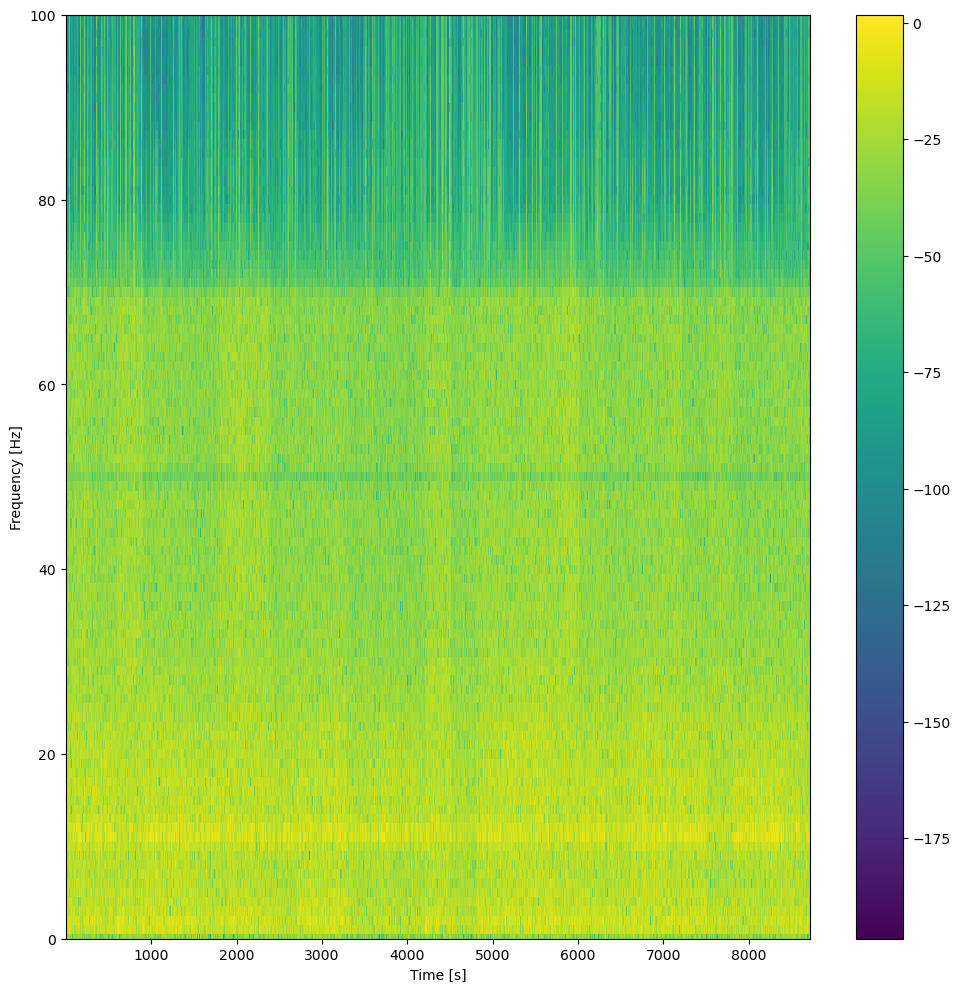

In [107]:
nfft = 500
overlap = 2
fs = 500
freqs , times, Sxx = spectrogram(EEG, fs=fs, nperseg=nfft, noverlap= overlap)

plt.figure(figsize=(12 , 12))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.colorbar()                
plt.ylim([0, 100])             
plt.xlabel('Time [s]')      
plt.ylabel('Frequency [Hz]')
plt.show()

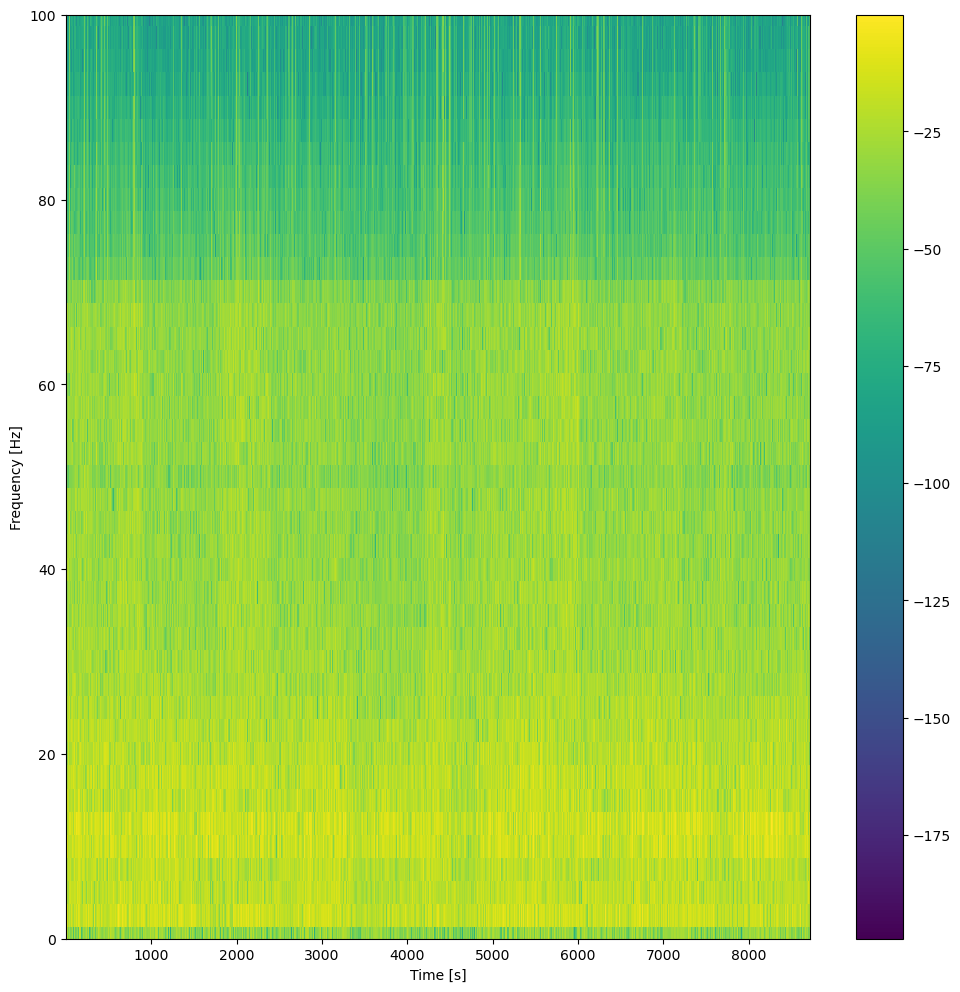

In [109]:
nfft = 200
overlap = 2
fs = 500
freqs , times, Sxx = spectrogram(EEG, fs=fs, nperseg=nfft, noverlap= overlap)

plt.figure(figsize=(12 , 12))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.colorbar()                
plt.ylim([0, 100])         
plt.xlabel('Time [s]')      
plt.ylabel('Frequency [Hz]')
plt.show()

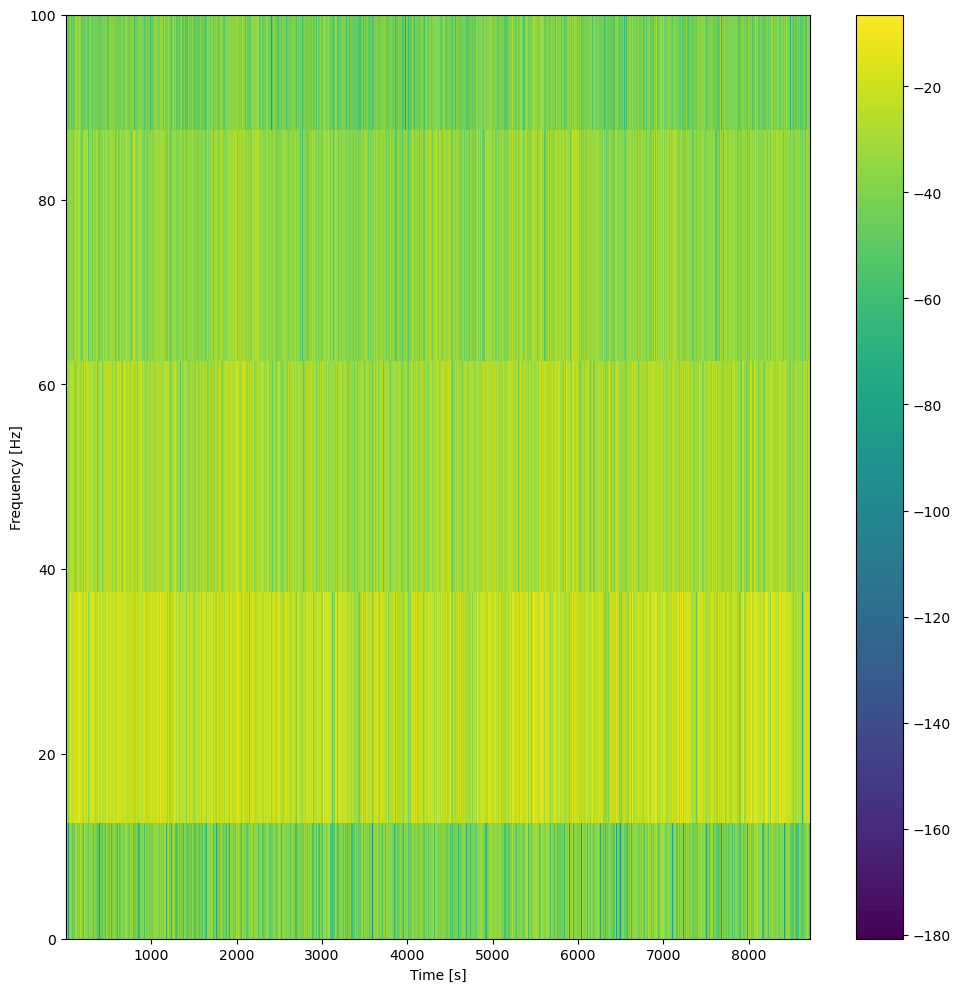

In [110]:
nfft = 20
overlap = 2
fs = 500
freqs , times, Sxx = spectrogram(EEG, fs=fs, nperseg=nfft, noverlap= overlap)

plt.figure(figsize=(12 , 12))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.colorbar()                
plt.ylim([0, 100])        
plt.xlabel('Time [s]')      
plt.ylabel('Frequency [Hz]')
plt.show()